In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from tqdm import tqdm
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
import torch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,f1_score
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import r2_score
import joblib
%matplotlib inline

In [2]:
df = pd.read_csv('Data/data_price_house_processing.csv')
# df['Giá'] = df['Giá'].round(1)
df

,Giá,Diện tích,Mặt tiền,Đường trước nhà,Số tầng,Số phòng,Số toilet,Nội thất_cơ bản,Nội thất_không,Nội thất_đầy đủ
0,4.4,36.0,6.0,3.0,3.0,3.0,3.0,0,1,0
1,5.7,58.7,4.0,5.0,2.0,2.0,2.0,0,1,0
2,7.0,80.0,4.0,12.0,4.0,4.0,5.0,0,1,0
3,4.8,68.0,4.0,5.0,2.0,4.0,3.0,0,1,0
4,800.0,28.0,35.0,6.0,2.0,1.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
36286,3.0,100.0,5.0,15.0,4.0,5.0,5.0,0,1,0
36287,10.0,200.0,10.0,15.0,4.0,3.0,3.0,0,1,0
36288,3.0,100.0,1.0,22.0,4.0,3.0,3.0,0,1,0
36289,3.5,342.0,1.0,1.0,1.0,1.0,1.0,0,1,0


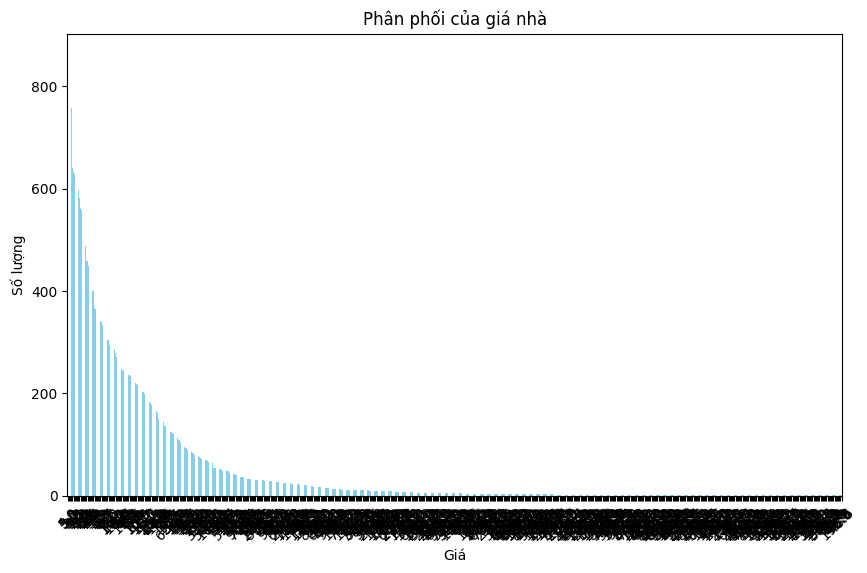

In [3]:
class_distribution = df['Giá'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Phân phối của giá nhà')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

In [4]:
# Hàm xây dựng mô hình Generator
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_dim=noise_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization())
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.01))
    model.add(BatchNormalization())
    model.add(Dense(output_dim, activation='linear'))
    
    return model

# Hàm xây dựng mô hình Discriminator
def build_discriminator():
    model = Sequential()
    model.add(Dense(256, input_dim=output_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Hàm xây dựng mô hình GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(noise_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    return gan

# Hàm huấn luyện GAN
def train_gan(generator, discriminator, gan, X_train, epochs=10000, batch_size=64):
    for epoch in range(epochs):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        generated_data = generator.predict(noise)
        
        real_data = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
        labels_real = np.ones((batch_size, 1))
        
        labels_fake = np.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(real_data, labels_real)
        d_loss_fake = discriminator.train_on_batch(generated_data, labels_fake)

        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        labels_gan = np.ones((batch_size, 1))
        
        g_loss = gan.train_on_batch(noise, labels_gan)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

In [5]:
data_for_gan = df[df.columns].values

# Xây dựng mô hình GAN
noise_dim = 100
output_dim = data_for_gan.shape[1]

generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Huấn luyện GAN
train_gan(generator, discriminator, gan, data_for_gan, epochs=10000, batch_size=64)




2/2 [==============================] - 0s 4ms/step


Epoch 0, D Loss: 0.41449450701475143, G Loss: 0.6146277189254761
2/2 [==============================] - 0s 2ms/step
Epoch 100, D Loss: 0.02746546803973615, G Loss: 3.4704318046569824
2/2 [==============================] - 0s 3ms/step
Epoch 200, D Loss: 0.17209003120660782, G Loss: 6.209245204925537
2/2 [==============================] - 0s 2ms/step
Epoch 300, D Loss: 0.024940411560237408, G Loss: 5.3082380294799805
2/2 [==============================] - 0s 3ms/step
Epoch 400, D Loss: 0.343524768948555, G Loss: 6.371261119842529
2/2 [==============================] - 0s 3ms/step
Epoch 500, D Loss: 0.04952523298561573, G Loss: 6.9663591384887695
2/2 [==============================] - 0s 3ms/step
Epoch 600, D Loss: 0.37768585979938507, G Loss: 2.4846768379211426
2/2 [==============================] - 0s 2ms/step
Epoch 700, D Loss: 0.294145867228508, G Loss: 3.940094470977783
2/2 [==============================] - 0s 2ms/step
Epoch 800

In [6]:
# df['Giá'] = df['Giá'].round(1)
class_distribution = df['Giá'].value_counts()
class_distribution

4.0      860
5.6      842
3.0      803
5.0      758
3.8      641
        ... 
196.0      1
48.9       1
48.6       1
72.9       1
48.5       1
Name: Giá, Length: 665, dtype: int64

In [7]:
df_new = df.copy()

In [8]:
import random
for key,value in class_distribution.items():
    if value/class_distribution.max() <0.5:
        i =random.uniform(0.5, 1)
        num_generated_samples = int(class_distribution.max()*i-value)  # Số lượng mẫu muốn sinh thêm
        noise = np.random.normal(0, 1, size=(num_generated_samples, noise_dim))
        generated_data = generator.predict(noise)
        
        # Kết hợp dữ liệu mới với dữ liệu đã có
        columns = df.columns
        generated_df = pd.DataFrame(generated_data, columns=columns)
        generated_df['Giá'] = key
        df_new = pd.concat([df_new, generated_df], ignore_index=True)
df_new

20/20 [==============================] - 0s 787us/step


,Giá,Diện tích,Mặt tiền,Đường trước nhà,Số tầng,Số phòng,Số toilet,Nội thất_cơ bản,Nội thất_không,Nội thất_đầy đủ
0,4.4,36.000000,6.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000
1,5.7,58.700000,4.000000,5.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000
2,7.0,80.000000,4.000000,12.000000,4.000000,4.000000,5.000000,0.000000,1.000000,0.000000
3,4.8,68.000000,4.000000,5.000000,2.000000,4.000000,3.000000,0.000000,1.000000,0.000000
4,800.0,28.000000,35.000000,6.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
424495,48.5,47.270855,4.260130,4.023609,2.612820,2.661759,2.056918,-0.011866,1.196377,0.005902
424496,48.5,29.531256,3.824337,1.880479,4.900727,4.452785,4.318937,-0.025038,1.250596,-0.021516
424497,48.5,29.978590,2.853759,4.493901,1.398371,2.258042,1.822951,-0.004332,1.103529,-0.027438
424498,48.5,92.219055,5.201483,8.226308,7.006810,8.118050,2.661857,-0.032366,1.323781,0.068469


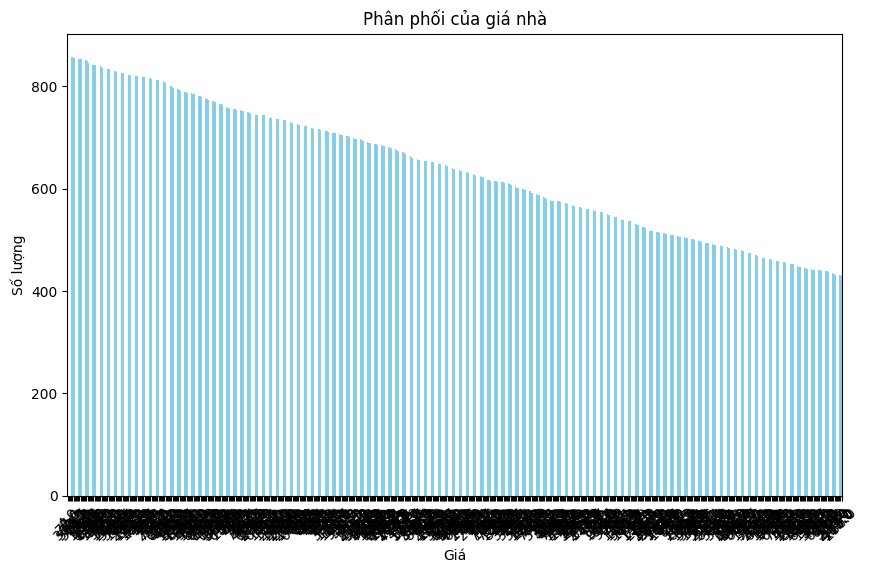

In [9]:
class_distribution = df_new['Giá'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Phân phối của giá nhà')
plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

In [10]:
df_new['Diện tích'] = df_new['Diện tích'].round(1)
df_new

,Giá,Diện tích,Mặt tiền,Đường trước nhà,Số tầng,Số phòng,Số toilet,Nội thất_cơ bản,Nội thất_không,Nội thất_đầy đủ
0,4.4,36.0,6.000000,3.000000,3.000000,3.000000,3.000000,0.000000,1.000000,0.000000
1,5.7,58.7,4.000000,5.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000
2,7.0,80.0,4.000000,12.000000,4.000000,4.000000,5.000000,0.000000,1.000000,0.000000
3,4.8,68.0,4.000000,5.000000,2.000000,4.000000,3.000000,0.000000,1.000000,0.000000
4,800.0,28.0,35.000000,6.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
424495,48.5,47.3,4.260130,4.023609,2.612820,2.661759,2.056918,-0.011866,1.196377,0.005902
424496,48.5,29.5,3.824337,1.880479,4.900727,4.452785,4.318937,-0.025038,1.250596,-0.021516
424497,48.5,30.0,2.853759,4.493901,1.398371,2.258042,1.822951,-0.004332,1.103529,-0.027438
424498,48.5,92.2,5.201483,8.226308,7.006810,8.118050,2.661857,-0.032366,1.323781,0.068469


In [11]:
for i in df_new.columns[2:]:
    df_new[i] = df_new[i].round().astype(int)
df_new

,Giá,Diện tích,Mặt tiền,Đường trước nhà,Số tầng,Số phòng,Số toilet,Nội thất_cơ bản,Nội thất_không,Nội thất_đầy đủ
0,4.4,36.0,6,3,3,3,3,0,1,0
1,5.7,58.7,4,5,2,2,2,0,1,0
2,7.0,80.0,4,12,4,4,5,0,1,0
3,4.8,68.0,4,5,2,4,3,0,1,0
4,800.0,28.0,35,6,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
424495,48.5,47.3,4,4,3,3,2,0,1,0
424496,48.5,29.5,4,2,5,4,4,0,1,0
424497,48.5,30.0,3,4,1,2,2,0,1,0
424498,48.5,92.2,5,8,7,8,3,0,1,0


In [12]:
X = df_new.iloc[:,1:]
y = df_new['Giá']
print(X.head(5))
print(y.head(5))

   Diện tích  Mặt tiền  Đường trước nhà  Số tầng  Số phòng  Số toilet  \
0       36.0         6                3        3         3          3   
1       58.7         4                5        2         2          2   
2       80.0         4               12        4         4          5   
3       68.0         4                5        2         4          3   
4       28.0        35                6        2         1          1   

   Nội thất_cơ bản  Nội thất_không  Nội thất_đầy đủ  
0                0               1                0  
1                0               1                0  
2                0               1                0  
3                0               1                0  
4                0               1                0  
0      4.4
1      5.7
2      7.0
3      4.8
4    800.0
Name: Giá, dtype: float64


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:

model_names = ['LinearRegression', 'RandomForestRegressor', 'XGBoost', 'SVR','Decision Tree']
# Danh sách các mô hình
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=1000, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=1000, random_state=42),
    'SVR': SVR(kernel='linear'),
    'Decision Tree': DecisionTreeRegressor()
}
best_model = None
mse_model = []
r2_model = []
model_trained = []

def train_and_evaluate_model(model_name, X_train, X_test, y_train, y_test):
    global best_model, best_mse, model_trained
    # Chọn mô hình tương ứng với tên
    model = models[model_name]

    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Đánh giá mô hình trên tập kiểm tra
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_trained.append(model)
    mse_model.append(mse)
    r2_model.append(r2)
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} R-squared: {r2}")
    joblib.dump(model, f'Model/using_generative_model/{model_name}.pkl')
    

In [ ]:
# Gọi hàm cho từng mô hình
for model_name in tqdm(model_names, desc='Training models'):
    train_and_evaluate_model(model_name, X_train, X_test, y_train, y_test)


Training models:  20%|█████████████▍                                                     | 1/5 [00:00<00:00,  5.44it/s]

LinearRegression MSE: 57274.490907061714
LinearRegression R-squared: 0.0011043438324542798


In [15]:
def train_and_evaluate_nn(X_train, X_test, y_train, y_test):
    global best_model, best_mse
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    
    # Biên soạn mô hình
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Huấn luyện mô hình
    model.fit(X_train, y_train, epochs=50, batch_size=128, validation_split=0.2)
    
    # Đánh giá mô hình trên tập kiểm tra
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"NeuralNetwork MSE: {mse}")
    print(f"NeuralNetwork R-squared: {r2}")

    return model,mse,r2

In [16]:
(nn_model,nn_mse,nn_r2) = train_and_evaluate_nn(X_train, X_test, y_train, y_test)

C:\Users\TanLoc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
3182/3182 [==============================] - 5s 1ms/step - loss: 55181.3281 - val_loss: 54242.9258
Epoch 2/50
3182/3182 [==============================] - 4s 1ms/step - loss: 54052.1172 - val_loss: 53468.6445
Epoch 3/50
3182/3182 [==============================] - 4s 1ms/step - loss: 54006.0195 - val_loss: 53393.4336
Epoch 4/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53981.3320 - val_loss: 53382.9336
Epoch 5/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53969.7383 - val_loss: 53337.5742
Epoch 6/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53938.4062 - val_loss: 53333.0586
Epoch 7/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53939.3672 - val_loss: 53294.7109
Epoch 8/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53909.3945 - val_loss: 53344.5859
Epoch 9/50
3182/3182 [==============================] - 3s 1ms/step - loss: 53895.8438 - val_loss: 53409.7578
Epoch 10/5